<a href="https://colab.research.google.com/github/Riddick4-droid/ComputerVision-TensorFlow/blob/main/DeepLearningMnistDatasefashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train_full[0].shape ##shape of the first image in the X_train_full dataset

(28, 28)

In [ ]:
##scaling the dataset
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
y_train.shape

(55000,)

In [ ]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
class_names[y_train[0]]

'Coat'

Axes(0.125,0.712609;0.168478x0.167391)
Axes(0.327174,0.712609;0.168478x0.167391)
Axes(0.529348,0.712609;0.168478x0.167391)
Axes(0.731522,0.712609;0.168478x0.167391)
Axes(0.125,0.511739;0.168478x0.167391)
Axes(0.327174,0.511739;0.168478x0.167391)
Axes(0.529348,0.511739;0.168478x0.167391)
Axes(0.731522,0.511739;0.168478x0.167391)
Axes(0.125,0.31087;0.168478x0.167391)
Axes(0.327174,0.31087;0.168478x0.167391)
Axes(0.529348,0.31087;0.168478x0.167391)
Axes(0.731522,0.31087;0.168478x0.167391)
Axes(0.125,0.11;0.168478x0.167391)
Axes(0.327174,0.11;0.168478x0.167391)
Axes(0.529348,0.11;0.168478x0.167391)
Axes(0.731522,0.11;0.168478x0.167391)


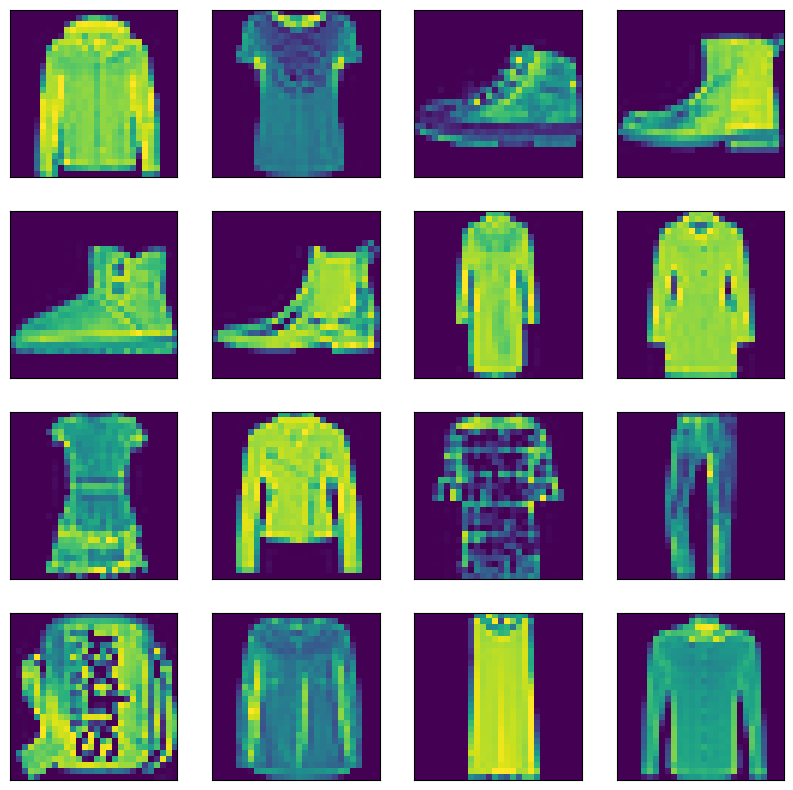

In [ ]:
fig, ax=plt.subplots(4,4, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    print(axi)
    axi.imshow(X_train[i]) #show the image of each of the 16 classes
    axi.set(xticks=[], yticks=[])

In [ ]:
##building the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
### compile the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy']) ##for multiclass classification problems
#model.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8536 - loss: 0.4198 - val_accuracy: 0.8620 - val_loss: 0.3980
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8622 - loss: 0.3946 - val_accuracy: 0.8610 - val_loss: 0.3911
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8703 - loss: 0.3721 - val_accuracy: 0.8710 - val_loss: 0.3650
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8740 - loss: 0.3595 - val_accuracy: 0.8722 - val_loss: 0.3664
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8786 - loss: 0.3437 - val_accuracy: 0.8750 - val_loss: 0.3467
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8843 - loss: 0.3310 - val_accuracy: 0.8768 - val_loss: 0.3465
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8867 - loss: 0.3201 - val_accuracy: 0.8806 - val_loss: 0.3362
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8915 - loss: 0.3065 - val_accuracy: 0.

In [ ]:
#### a history object is created during the training that keeps track of all the training and validation accuracy and loss values during each step of the training thus 'epoch'

In [ ]:
data = pd.DataFrame(history.history)

In [ ]:
data['epochs'] = history.epoch

In [ ]:
data

,accuracy,loss,val_accuracy,val_loss,epochs
0,0.856255,0.413526,0.8620,0.398019,0
1,0.863618,0.389898,0.8610,0.391059,1
2,0.870673,0.370422,0.8710,0.364977,2
3,0.875145,0.353820,0.8722,0.366403,3
4,0.879309,0.342076,0.8750,0.346674,4
5,0.885000,0.327973,0.8768,0.346472,5
6,0.886545,0.317581,0.8806,0.336176,6
7,0.890618,0.307521,0.8838,0.330066,7
8,0.894709,0.297953,0.8846,0.320157,8
9,0.897709,0.289051,0.8900,0.320917,9


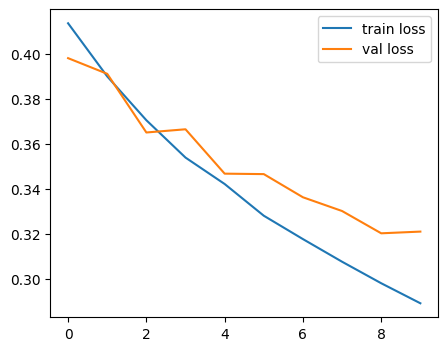

In [ ]:
 import matplotlib

 matplotlib.rcParams['figure.figsize']=(5,4)

 plt.plot(history.history['loss'],label='train loss')
 plt.plot(history.history['val_loss'],label='val loss')
 plt.legend();

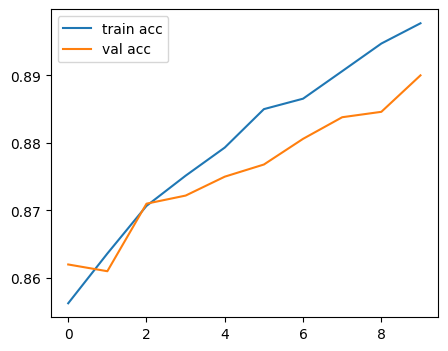

In [ ]:
 plt.plot(history.history['accuracy'],label='train acc')
 plt.plot(history.history['val_accuracy'],label='val acc')
 plt.legend();

In [ ]:
###evaluating the model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8450 - loss: 66.5434


[70.55803680419922, 0.8385999798774719]

In [ ]:
###use our model to make predictions
X_new = X_test[:1]
X_new.shape

(1, 28, 28)

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2) ##sparse matrix to collect index of the label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
predict_x = model.predict(X_test)
print(predict_x.shape)
print(predict_x[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[0.         0.         0.99999994 0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
##using the argmax function
y_pred = np.argmax(predict_x,axis=1)

In [ ]:
y_pred #this shows the index location of the labels
y_pred.shape

(10000,)

In [ ]:
##compare the actuals and predicted labels
pd.DataFrame(list(zip(np.array(class_names)[y_test], np.array(class_names)[y_pred]))).head(39)

,0,1
0,Ankle Boot,Ankle Boot
1,Pullover,Pullover
2,Trouser,Trouser
3,Trouser,Trouser
4,Shirt,Shirt
5,Trouser,Trouser
6,Coat,Coat
7,Shirt,Coat
8,Sandal,Sandal
9,Sneaker,Sneaker
